# PRACTICAL Lesson  5 

##MARKOV CHAINS


## CONTENT

5.1. INTRODUCTION

5.2. PRACTICAL EXAMPLE. HOW A STOCK SHARE EVOLVES

5.3. PROPOSED EXERCISE: WILL THE RICH BECOME RICHER AND THE POOR BECOME POORER?

5.4. PROPOSED PROBLEM. SEPTEMBER 2002 EXAMINATION

5.5. PROPOSED EXERCISES. REPAIRING RIVETING MACHINES


In [14]:
!pip install networkx
!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install ipywidgets

In [15]:

from markovchain import MarkovChain as drwMarkovChain

import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import numpy as np
import pandas as pd
# module from this repository

In [16]:
1+1

2

In [37]:


class MarkovChain():
    def __init__(self, MC, names) -> None:
        self.MC = np.array(MC)
        self.names = names

    def get_graph(self):
        mc = drwMarkovChain(self.MC, self.names)
        fig=mc.draw()


    def get_transition_matrix(self):
        return self.MC
    
    def get_transition_matrix_n_steps(self, n):
        return np.linalg.matrix_power(self.MC, n)

    def check_reducibility(self):
        # Find Pt-I and check if it is irreducible
        A = np.transpose(self.MC) - np.eye(self.MC.shape[0])
        print(A)
        print(np.linalg.matrix_rank(A))
        if np.linalg.matrix_rank(A) == self.MC.shape[0]:
            print("Irreducible")
        else:
            print("Reducible")




    def get_estimated_first_passage_times(self):
        U =[]
        for i in range(self.MC.shape[0]):
            # set column i to 0
            A= self.MC.copy()
            A[:,i] = 0
            # I-A
            A = np.eye(self.MC.shape[0]) - A
            # set b to 1
            b = np.ones(self.MC.shape[0])
            # solve the system of linear equations
            x = np.linalg.solve(A, b)
            # x = np.linalg.inv(A) * b
            U.append(x)
        U = np.transpose(np.array(U))


        return U

    def get_probability_first_time_passage_n_steps(self, n, i, j):
    #    f_{i j}^{(1)}=p_{i j}^{(1)}
    # f_{i j}^{(n)}=p_{i j}^{(n)}-\sum_{k=1}^{n-1} f_{i j}^{(k)} \cdot p_{i j}^{(n-k)}

        f=[]
        for n1 in range(1,n+1):
            if n1 == 1:
                f.append(self.MC[i,j])
            else:

                f.append(self.get_transition_matrix_n_steps(n1)[i,j] - np.sum([f[k-1]*self.get_transition_matrix_n_steps(n1-k)[i,j] for k in range(1,n1)]))
        print(f)
        return f[-1]

    def get_steady_state(self): 
        # Let P be the transition matrix of the Markov chain.

        # Lets define the matrix A = P^T - I
        A =np.transpose(self.MC) - np.eye(self.MC.shape[0])

        # Add a row of ones to A at the bottom
        A = np.vstack((A, np.ones(self.MC.shape[0])))

        # define b = [0, 0, ..., 0, 1]^T
        b = np.zeros(self.MC.shape[0])
        b = np.append(b, 1)
        # Solve the system of linear equations Ax = b, remember A is not square
        x = np.linalg.lstsq(A, b, rcond=None)[0]

        return x


    def get_probability_first_time_passage_n_simulations_through_simulation(self,  i, j, n_simulations):
        # Simulate the Markov Chain
        steps_to_j = []
        for _ in range(n_simulations):
            # Start in state i
            state = i
            # Count the number of steps
            steps = 0
            # Repeat until we reach state j
            while state != j or steps == 0:
                # Take a step
                state = np.random.choice(range(self.MC.shape[0]), p=self.MC[state])
                # Increase the number of steps
                steps += 1
            # Add the number of steps to the list
            steps_to_j.append(steps)



        
        
        return np.mean(steps_to_j),steps_to_j

    def draw_probability_distribution_first_time_n_simulation(self,i,j,n):
        mean,list = self.get_probability_first_time_passage_n_simulations_through_simulation(i,j,n)

        x= np.arange(1, len(list)+1)
        y = [np.mean(list[:i]) for i in x]

        # Find the probability of going from state i to state j in n steps

        real=self.get_estimated_first_passage_times()[i,j]


        plt.plot(x,y)
        plt.plot(x,[real]*len(x))
        plt.show()




        

    
    
    




### 5.1 INTRODUCTION

In decision-making problems, the need to make decisions based on phenomena with associated uncertainty frequently arises.

A stochastic process is defined as a series of aleatory variables $\{\mathrm{Xt}\}$, where index $t$ takes the values of a given set $T$. For example, process $X 1, X 2, X 3, \ldots$ can represent a change made by customers in a detergent brand name.

Another simple case is that in which knowledge about the state of the system in consecutive instants prior to $t$ provides certain information on the state of the system, although this information is totally contained in the last instant. A process with these characteristics is called a Markov Process. For instance, if the change in a detergent brand name made by customers in one month depends only on their choice in the previous month.

A stochastic process $\{\mathrm{Xt}\}$ is a Markov Chain if it has the following characteristics:

1. A finite number of states.
2. The Markovian property. This property is the equivalent to establishing that the conditional probability of any future "event", given any past "event" and the present state, is independent of the past event and that it depends only on the current process state.
3. Stationary transition probabilities. Having stationary transition probabilities means that the transition probabilities do not change over time.
4. A series of initial probabilities.

If the transition probabilities (in the probabilities example of customers changing from one detergent brand name (state) to another) continue to be constant with time, the Markov Process is called a Markov Chain.

An example of a Markov Chain: let's consider the following model for the a share value. At the end of a given day, the price is recorded. If the share goes up, the probability of it going up tomorrow is 0.7 . If the share goes down, the probability of it going up tomorrow is only 0.5 . This is a Markov Chain where state $0(\mathrm{e} 0)$ represents the share price going up and state 1 (e1) represents it going down. The transition Matrix is given by:

| States | E0=S | E1=B |
| :---: | :---: | :---: |
| E0=S | 0.70 | 0.30 |
| E1=B | 0.50 | 0.50 |

In [38]:

# Define the states and transition probabilities
states = ['S', 'B']
transition_probabilities = [[0, 1], [0, 1]]

# \left[\begin{array}{cccc}
# 0.080 & 0.184 & 0.368 & 0.368 \\
# 0.632 & 0.362 & 0 & 0 \\
# 0.264 & 0.368 & 0.368 & 0 \\
# 0.080 & 0.184 & 0.368 & 0.368
# \end{array}\right]

transition_probabilities = [[0.080, 0.184, 0.368, 0.368],
                            [0.632, 0.368, 0, 0],
                            [0.264, 0.368, 0.368, 0],
                            [0.080, 0.184, 0.368, 0.368]]
states = ['A', 'B', 'C', 'D']



# Create the Markov chain   
mc = MarkovChain(transition_probabilities, states)

# Draw the Markov chain
mc.get_estimated_first_passage_times()
mc.get_steady_state()
mc.get_probability_first_time_passage_n_steps(2,0,1)

[0.184, 0.251712]


0.251712

[[-0.92   0.632  0.264  0.08 ]
 [ 0.184 -0.632  0.368  0.184]
 [ 0.368  0.    -0.632  0.368]
 [ 0.368  0.     0.    -0.632]]
3
Reducible


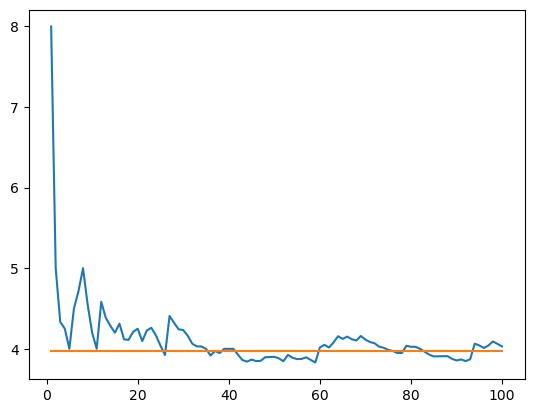

In [39]:
transition_probabilities = [[0.080, 0.184, 0.368, 0.368],
                            [0.632, 0.368, 0, 0],
                            [0.264, 0.368, 0.368, 0],
                            [0.080, 0.184, 0.368, 0.368]]
states = ['A', 'B', 'C', 'D']
mc = MarkovChain(transition_probabilities, states)
mc.check_reducibility()
mc.draw_probability_distribution_first_time_n_simulation(0,1,100)


In [41]:
# Input widgets

# Widget for input text to enter the number of states of a Markov chain
states_input = widgets.IntText(
    value=2,
    description='Number of States:',
    style={'description_width': 'initial'}
)




# Function to create an n*n matrix input widget with state name inputs in both row and column
def create_matrix_input(n):
    matrix_children = [widgets.Text(value='', disabled=True)]  # Empty top-left corner cell
    # Top row state names
    matrix_children.extend([widgets.Text(value=f'State {i+1}', layout=widgets.Layout(width='auto')) for i in range(n)])

    for i in range(n):
        # Left column state names
        matrix_children.append(widgets.Text(value=f'State {i+1}', layout=widgets.Layout(width='auto')))
        # Row for transition matrix # let the step be 0.1
        matrix_children.extend([widgets.FloatText(value=1/n, step=0.1,  layout=widgets.Layout(width='auto')) for _ in range(n)])

    matrix_input = widgets.GridBox(
        children=matrix_children,
        layout=widgets.Layout(
            width='100%',
            grid_template_columns=f'auto {" ".join(["auto"] * n)}'
        )
    )
    return matrix_input

# Initially, create a 2*2 matrix input widget with state names
matrix_input = create_matrix_input(2)

# Update function for the matrix input widget when the number of states changes
def update_matrix_input(change):
    with output:
        clear_output()
    n = change['new']
    global matrix_input
    matrix_input = create_matrix_input(n)
    # matrix_widget.children = [states_input, matrix_input, calc_button, draw_button, output]
    matrix_widget.children = [box_0,states_input, matrix_input, output]



states_input.observe(update_matrix_input, names='value')


# Buttons

# Button to find the steady state probabilities
calc_button = widgets.Button(description="Calculate Steady States", layout=widgets.Layout(flex='1 1 0%', width='auto'),)
draw_button = widgets.Button(description="Draw Graph", layout=widgets.Layout(flex='1 1 0%', width='auto'))
draw_prob_button = widgets.Button(description="Calculate probabilitye \n fsd", layout=widgets.Layout(flex='1 1 0%', width='auto'))
calc_first_time_prob_button = widgets.Button(description="Calculate first time probabilities", layout=widgets.Layout(flex='1 1 0%', width='auto'))
estimate_and_draw_first_time_prob_button = widgets.Button(description="Estimate and draw    \n first time probabilities", layout=widgets.Layout(flex='1 1 0%', width='auto'))



# Button to find the probability of going from state i to state j in n steps 
solve_prob_button = widgets.Button(description="Solve", layout=widgets.Layout(flex='1 1 0%', width='auto'))
solve_estimated_prob_button = widgets.Button(description="Solve", layout=widgets.Layout(flex='1 1 0%', width='auto'))
solve_estimate_and_draw_button = widgets.Button(description="Solve", layout=widgets.Layout(flex='1 1 0%', width='auto'))




# Output widget
output = widgets.Output()


# Functions to handle the button click events

# Function to handle the button click event
def on_calc_button_clicked(b):
    with output:
        clear_output()
        n = states_input.value
        matrix_values = [child.value for child in matrix_input.children if isinstance(child, widgets.FloatText)]
        state_names = [child.value for child in matrix_input.children if isinstance(child, widgets.Text) and child.value != '']
        state_names =  state_names[:len(state_names)//2]

        transition_matrix = np.array(matrix_values).reshape(n, n)
        try:
            M = MarkovChain(transition_matrix, state_names)
            sol = M.get_steady_state()
            display(f"Steady States: {sol}")
            return sol
        except Exception as e:
            display(f"Error: {e}")

def on_draw_button_clicked(b):
    with output:
        clear_output()
        n = states_input.value
        matrix_values = [child.value for child in matrix_input.children if isinstance(child, widgets.FloatText)]
        state_names = [child.value for child in matrix_input.children if isinstance(child, widgets.Text) and child.value != '']
        # get unique state names
        state_names =  state_names[:len(state_names)//2]
        transition_matrix = np.array(matrix_values).reshape(n, n)
        try:
            M = MarkovChain(transition_matrix, state_names)
            M.get_graph()
        except Exception as e:
            display(f"Error: {e}")
n = states_input.value

matrix_values = [child.value for child in matrix_input.children if isinstance(child, widgets.FloatText)]
state_names = [child.value for child in matrix_input.children if isinstance(child, widgets.Text) and child.value != '']
# get unique state names
state_names =  state_names[:len(state_names)//2]
transition_matrix = np.array(matrix_values).reshape(n, n)

# Create three input widgets for a sub query
i_input = widgets.Dropdown(
    options=state_names,
    description='From:',
    style={'description_width': 'initial'}
)
j_input = widgets.Dropdown(
    options=state_names,
    description='To:',
    style={'description_width': 'initial'}
)
n_input = widgets.IntText(
    value=2,
    description='Number of Steps:',
        style={'description_width': 'initial'})
def on_draw_prob_button_clicked(b):
    n = states_input.value
    global matrix_input

    matrix_values = [child.value for child in matrix_input.children if isinstance(child, widgets.FloatText)]
    state_names = [child.value for child in matrix_input.children if isinstance(child, widgets.Text) and child.value != '']
    # get unique state names
    state_names =  state_names[:len(state_names)//2]

    transition_matrix = np.array(matrix_values).reshape(n, n)
    # set i_input and j_input options
    i_input.options = state_names
    j_input.options = state_names


    # matrix_widget.children = [states_input, matrix_input, calc_button, draw_button, draw_prob_button, i_input, j_input, n_input,solve_prob_button, output]

    matrix_widget.children= [box_0, states_input, matrix_input, i_input, j_input, n_input,solve_prob_button, output]



def solve_prob_button_clicked(b):
    try:
        with output:
            clear_output()
            matrix_values = [child.value for child in matrix_input.children if isinstance(child, widgets.FloatText)]
            state_names = [child.value for child in matrix_input.children if isinstance(child, widgets.Text) and child.value != '']
            # get unique state names
            state_names =  state_names[:len(state_names)//2]
            n = len(state_names)
            transition_matrix = np.array(matrix_values).reshape(n, n)
            M = MarkovChain(transition_matrix, state_names)
            display(i_input.value)
            display(j_input.value)
            display(n_input.value)
            # Get the index of the state names
            i = state_names.index(i_input.value)
            j = state_names.index(j_input.value)
            display(M.get_probability_first_time_passage_n_steps(n_input.value,i,j))
    except Exception as e:
        print(f"Error: {e}")

box_layout = widgets.Layout(display='flex',
                    flex_flow='row',
                    align_items='stretch',
                    height='80px')



items_0 = [calc_button,draw_button,  draw_prob_button, calc_first_time_prob_button , estimate_and_draw_first_time_prob_button , solve_estimated_prob_button]
# change height of the buttons to 'auto' to let the button grow vertically
for item in items_0:
    item.layout.height = 'auto'

    
for item in items_0:
    item.style.button_color = 'lightblue'
    item.style.font_weight = 'bold'
    item.style.font_size = 'large'
    item.style.color = 'black'
    item.style.border_color = 'black'
    item.style.border_width = '1px'
    item.style.border_radius = '5px'
    item.style.padding = '10px'
    item.style.margin = '10px'
    item.layout.width = 'auto'
    item.layout.height = 'auto'
    item.layout.flex = '1 1 0%'
    item.layout.align_items = 'stretch'
    item.layout.justify_content = 'center'
    item.layout.align_content = 'center'
    item.layout.display = 'flex'
    item.layout.flex_flow = 'row'
    item.layout.flex_wrap = 'wrap'
    



box_0 = widgets.Box(children=items_0, layout=box_layout)


# Function to handle the button click event for calculating first time probabilities
def on_calc_first_time_prob_button_clicked(b):
    try:
        with output:
            clear_output()
            matrix_values = [child.value for child in matrix_input.children if isinstance(child, widgets.FloatText)]
            state_names = [child.value for child in matrix_input.children if isinstance(child, widgets.Text) and child.value != '']
            # get unique state names    
            state_names =  state_names[:len(state_names)//2]

            n = len(state_names)
            transition_matrix = np.array(matrix_values).reshape(n, n)
            print(transition_matrix)
            M = MarkovChain(transition_matrix, state_names)

            
            df = pd.DataFrame(M.get_estimated_first_passage_times(), columns=state_names, index=state_names)
            display(df)
            
    except Exception as e:
        print(f"Error: {e}")

# Function to handle the button click event for estimating and drawing first time probabilities
def solve_estimate_and_draw_first_time_prob_button_clicked(b):
    try:
        with output:
            clear_output()
            matrix_values = [child.value for child in matrix_input.children if isinstance(child, widgets.FloatText)]
            state_names = [child.value for child in matrix_input.children if isinstance(child, widgets.Text) and child.value != '']
            # get unique state names
            state_names =  state_names[:len(state_names)//2]
            n = len(state_names)
            transition_matrix = np.array(matrix_values).reshape(n, n)
            M = MarkovChain(transition_matrix, state_names)
            # Get the index of the state names
            i = state_names.index(i_input.value)
            j = state_names.index(j_input.value)
            M.draw_probability_distribution_first_time_n_simulation(i,j,n_input.value)
    except Exception as e:
        print(f"Error: {e}")

def on_estimate_and_draw_first_time_prob_button_clicked(b):
    n = states_input.value
    global matrix_input

    matrix_values = [child.value for child in matrix_input.children if isinstance(child, widgets.FloatText)]
    state_names = [child.value for child in matrix_input.children if isinstance(child, widgets.Text) and child.value != '']
    # get unique state names
    state_names =  state_names[:len(state_names)//2]
    transition_matrix = np.array(matrix_values).reshape(n, n)
    # set i_input and j_input options
    i_input.options = state_names
    j_input.options = state_names


    # matrix_widget.children = [states_input, matrix_input, calc_button, draw_button, draw_prob_button, i_input, j_input, n_input,solve_prob_button, output]

    matrix_widget.children= [box_0, states_input, matrix_input, i_input, j_input, n_input, solve_estimate_and_draw_button, output]


# Function to handle the button click event for solving estimated probabilities
def on_solve_estimated_prob_button_clicked(b):
    try:
        with output:
            clear_output()
            matrix_values = [child.value for child in matrix_input.children if isinstance(child, widgets.FloatText)]
            state_names = [child.value for child in matrix_input.children if isinstance(child, widgets.Text) and child.value != '']
            # get unique state names
            state_names =  state_names[:len(state_names)//2]
            n = len(state_names)
            transition_matrix = np.array(matrix_values).reshape(n, n)
            print(transition_matrix)
            M = MarkovChain(transition_matrix, state_names)
            # Get the index of the state names
            i = state_names.index(i_input.value)
            
            j = state_names.index(j_input.value)
            M.solve_estimated_probabilities(n_input.value,i,j)
    except Exception as e:
        print(f"Error: {e}")
        
calc_button.on_click(on_calc_button_clicked)
draw_button.on_click(on_draw_button_clicked)
draw_prob_button.on_click(on_draw_prob_button_clicked)
solve_prob_button.on_click(solve_prob_button_clicked)
solve_estimate_and_draw_button.on_click(solve_estimate_and_draw_first_time_prob_button_clicked)
# Attach the functions to the buttons
calc_first_time_prob_button.on_click(on_calc_first_time_prob_button_clicked)
estimate_and_draw_first_time_prob_button.on_click(on_estimate_and_draw_first_time_prob_button_clicked)
solve_estimated_prob_button.on_click(on_solve_estimated_prob_button_clicked)
# Layout the widgets
matrix_widget = widgets.VBox([box_0, states_input, matrix_input,   output])
display(matrix_widget)


### 5.2 PRACTICAL EXAMPLE: HOW A STOCK SHARE EVOLVES

A Stock Market analyst has observed the evolution of an electronic products firm's shares over the last few months, and concludes that this evolution can be modelled with a Markov Chain.

The probability that the share goes up or down on a given day depends on what has happened on the 2 previous days:

Indeed, if the share went up on 2 days (today and yesterday), the probability of it going up tomorrow is 0.9 . If it went up today but went down yesterday, the probability of it going up tomorrow is 0.6 . If it went down today but went up yesterday, the probability of it going up tomorrow is 0.5 . Finally, if it went down on the last 2 days, the probability of it going up tomorrow is 0.3 .

## QUESTIONS:


### What are the Markov Chain states?


### What is the one-step transition probabilities matrix?


(The next questions must be solved with the help of the CaDMGip software)

- What is the probability of a share going up or down on a given day?
- What is the probability of a share that went up yesterday and today going down the day after tomorrow?
- The transition probabilities matrix with 2, 3,10 and 30 steps
- The first-passage times matrix.




### 5.3 PROPOSED EXERCISE: WILL THE RICH BECOME RICHER, AND THE POOR BECOME POORER?

During the 1992 American presidential campaign, the Democrat candidate, Bill Clinton, defending he would raise taxes for the "rich" and would give some relief to tax payers earning average and low salaries.

One of the US Treasury's functions is to study tax proposals and to determine how they could affect the country (the economy, distribution of the population's income, and other concepts). One of the studies conducted by this Department, based on 14,351 tax payers and tax declarations between 1979 and 1988, discovered that a
considerable number of Americans on low income would move up on the income scale, while those who were higher up on the income scale would stay where they were.

The data in Table 1 are the percentages of tax payers who moved between the various levels of income at the end of the decade (adjusted by inflation). For instance, $47.3 \%$ of tax payers who earned $\$ 200,000$ or more at the beginning of the decade remained in this category at the end of this period; the income of $38.6 \%$ of tax payers went down to the next category (between $\$ 45,000$ and $\$ 199,000$ ); the income of $7.7 \%$ went down and fell within the $\$ 25,000-44,900$ range, and even $2.2 \%$ earned the income of "poor people, that is, less than $\$ 7,000$.

| Table 1. Shift in Income |  |  |  |  |  |  |  |
| :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: |
|  | Income at the end of the decade |  |  |  |  |  |  |
| Income at the <br> beginning of <br> the decade | $\$ 200,000$ <br> or more | $\$ 45,000$ <br> to <br> $\$ 199,999$ | $\$ 25,000$ to <br> $\$ 44,999$ | $\$ 15,000$ to <br> $\$ 24,999$ | $\$ 7,000$ to <br> $\$ 14,999$ | Less than <br> $\$ 7,000$ |  |
| $\$ 200,000$ or <br> more | $47.3 \%$ | $38.6 \%$ | $7.7 \%$ | $3.8 \%$ | $0.4 \%$ | $2.2 \%$ |  |
| $\$ 45,000$ to <br> $\$ 199,999$ | 5.3 | 59.4 | 20.3 | 9.4 | 4.4 | 1.2 |  |
| $\$ 25,000$ to <br> $\$ 44,999$ | 0.6 | 34.8 | 37.5 | 14.8 | 9.3 | 3.0 |  |
| $\$ 15,000$ to <br> $\$ 24,999$ | 0.4 | 14.6 | 32.3 | 33.0 | 14.0 | 5.7 |  |
| $\$ 7,000$ to <br> $\$ 14,999$ | 0.3 | 10.8 | 19.5 | 29.6 | 29.0 | 10.8 |  |
| Less than <br> $\$ 7,000$ | 0.3 | 14.4 | 25.3 | 25.0 | 20.7 | 14.3 |  |

Sarah $\mathrm{Hu}$, a senior analyst in a non-profit institute, has been assigned a project to analyse the distribution of the US population's income, and also the effect that the various proposed taxes might have. Recently, some groups have shown an interest in stressing that in the USA, "the rich are becoming richer and the poor are becoming poorer". Ms. Hu has been commissioned to determine whether she can shed some light on this matter with the results of the US Treasury Study. She feels particularly intrigued by the similarity between Table 1 and some Markov Processes that she studied when she was at University.

Ms. Hu has estimated that, currently, $1 \%$ of the US population earns more than $\$ 200,000$; $19 \%$ earn between $\$ 45,000$ and $\$ 199,000$; the income of $20 \%$ falls between $\$ 25,000$ and $\$ 44,999$; the earnings of $20 \%$ fall within the $\$ 15,000-24,999$ range; another $20 \%$ earn somewhere between $\$ 7,000$ and $\$ 14,999$; finally, the income of $20 \%$ is below $\$ 7,000$.

## QUESTIONS:

1. What are the Markov Chain states?
2. Based on the data in Table 1, what will the long-term income distribution be?
3. What percentage of the population who earn less than $\$ 7,000$ will earn more than $\$ 200,000$ after 20 years? What is the percentage for $\$ 100,000$ ?
4. What is the expected number of years that the tax payers who earn under $\$ 7,000$ will earn more than $\$ 200,000$ ? And $\$ 100,000$ ?
5. How has the income distribution changed in relation to the initial income distribution?
6. Using the CADMGIP tool to help you, respond to the question that the problem considers; will the rich become richer, and the poor become poorer?



### 5.4 PROPOSED PROBLEM.

At the beginning of each year, my car can be in a good, regular or bad state. There is a $90 \%$ probability of a good car still being good at the beginning of the next year, a $5 \%$ one of it being in a regular state, and a $5 \%$ one of it being in a bad state. There is s 70\% probability that a car in a regular state will still be regular at the beginning of the next year, and a $30 \%$ one that it will be in a bad state. It costs 12,000 to buy a good car, 5,000 euros to buy a regular car (5000 euros is also the price to sell it), but a bad car has no sale value and must be immediately replaced with a good car. The cost to maintain a car in a good state is 1,000 euros a year, and 2,000 euros a year for a car in a regular state. Let's assume that the cost to run a car per year depends on the type of car the driver has at the beginning of the year..

Let's assume that a car in a bad state only happens at the end of a year, and then (at the beginning of the next year) the car in a bad state "must be replaced immediately". Should I replace my car as soon as it is in a regular state, or should I wait until it is in a bad state? To solve this matter:

a) Define the Markov chains for the three states (Good, Regular and Bad at the beginning of the year) for all the replacement policies (Policy A: Replace when the car is in a bad state; Policy B: Replace when the car is in a regular state).

b) Obtain the steady-state probabilities.

c) Determine the mean cost per year for each replacement policy.

d) What replacement policy would you recommend?




### 5.5 PROPOSED EXERCISE. REPAIRING RIVETING MACHINES

On a daily basis, a maintenance technician of a given firm checks adjustments on an automatic machine that produces rivets for the air-sea industry, among other tasks.

By checking a certain number of rivets, he knows that it is not necessary to adjust the machine (A), it requires slight adjustment (B), some adjustment (C) or considerable adjustment (D).

The technician has verified that if the machine is in state A, there is an $80 \%$ probability that it will remain in this state until the next day, and a $20 \%$ probability that it will enter state $B$.

If the machine is in state $B$, there is a $70 \%$ probability that it will remain in this state until the next day, and a $5 \%$ probability that it will require considerable adjustment.

If the machine is in state $\mathrm{C}$, there is a $50 \%$ probability that it will require considerable adjustment, and it is quite certain that its state will not improve.

If the machine requires considerable adjustment, it will remain in this state permanently.

However, the technician's job does not consist in stopping and observing the machine; instead, if the machine is found to be in state $D$, it must be adjusted. Nevertheless, the technician is not clear if when the machine is in any of the other states what interests the firm more from an economic perspective.

This is because a complete adjustment costs 20,000 m.u. If the machine is in state A and begins to work at the beginning of the day, it will not produce any extra cost through loss of quality. If the technician adjusts it in state $B$, the cost for the firm is 5,000 m.u. that day, and it is 8,000 m.u. if the machine is in state C.

The maintenance technician needs to economically evaluate if it is less costly to also adjust the machine completely when it is in state C.

a) Model the problem with Markov Chains (one per maintenance policy) $(40 \%)$

b) Which policy is less costly? (40\%)

c) What would the adjustment cost be so that the answer to question b) would have been the opposite? $(10 \%)$

d) With the original maintenance policy, what is the expected firstpassage time from state $D$ to state $A$ ? What is the recurrence time of state $D$ ? (10\%)
